Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Barthélemy Paléologue"
COLLABORATORS = ""

---

# IN573-2022 Lab1 : Light, color and images


In this first lab, the goal is to manipulate images and its pixel colors.
Let us first import the necessary python libraries

In [2]:
from ipywidgets import interact, interact_manual
import ipywidgets as widgets
# grey images are stored in memory as 2D arrays, color images as 3D arrays
import numpy as np
import cv2 as cv  # opencv computer vision library
from skimage import io  # for io.imread
from matplotlib import pyplot as plt  # ploting


def imshow(image, cmap=None):
    plt.imshow(image, cmap)
    plt.show()


# interactive notebook widgets

Read first an image using `io.imread`  and display it using `imshow`.

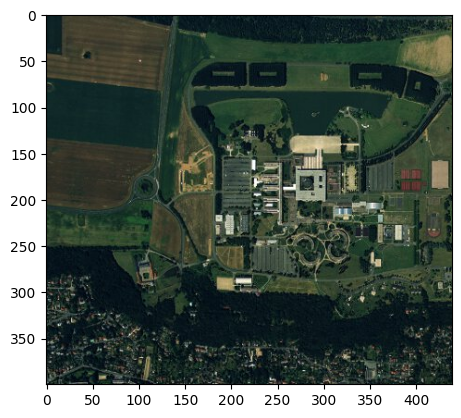

In [3]:
url = 'https://wxs.ign.fr/x7yv499pbcguxhhxh8syehwe/iipsrv.fcgi?FIF=DEMAT.PVA/A99S00772/IGNF_PVA_1-0__1999-07-17__CA99S00772_1999_FR9040_0759.jp2&LYR=20&RGN=0.25,0.55,0.2,0.2&WID=400&ROT=90&GAM=3&CVT=JPG'
imageRGB = io.imread(url)
imshow(imageRGB)

What is the size of this image ? print the `shape` of the image. Note that this is a 3D array (width, height, number of color channels)

In [4]:
imageRGB.shape

(400, 439, 3)

Colors should not displayed as you expected : imread lays out image data in BGR order, meaning blue is in channel 0 (indices [:,:,0]), green in channel 1 and red in channel 0.
Now, extract side by side the 3 color channels and display them side by side.

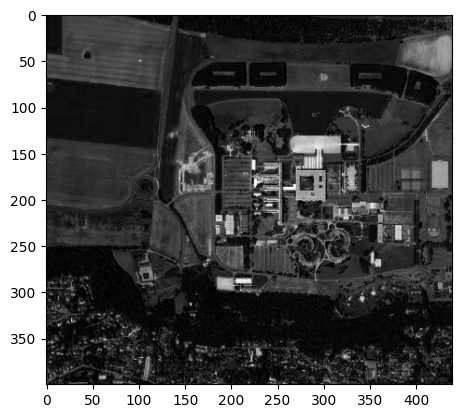

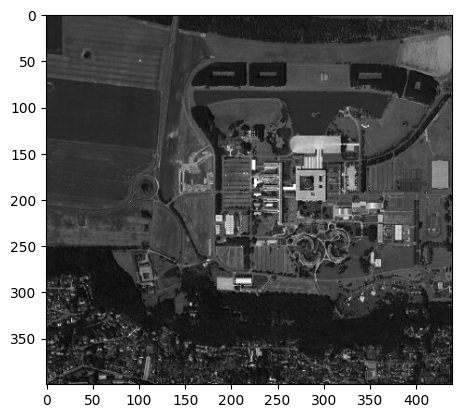

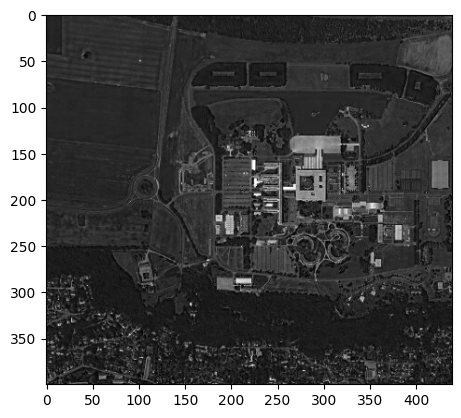

In [5]:
# The colors of the image seem fine to me, it must be something with the version of one of the libraries
# I will still consider BGR even though it is not technically necessary.

imageB = imageRGB[:, :, 0]
imshow(imageB, cmap='gray')

imageG = imageRGB[:, :, 1]
imshow(imageG, cmap='gray')

imageR = imageRGB[:, :, 2]
imshow(imageR, cmap='gray')

# BGR to RGB

[Opencv](https://opencv.org/) is a popular Computer Vision Library, usable in many languages (C++, python...). 

It offers `cv.cvtColor` to perform color conversions, which transform independently all pixel values from one color representation to another.

For instance, its option `cv.COLOR_BGR2RGB` may be used to convert from BGR to RGB channel order.
More simply, it swaps the red and blue color channels.

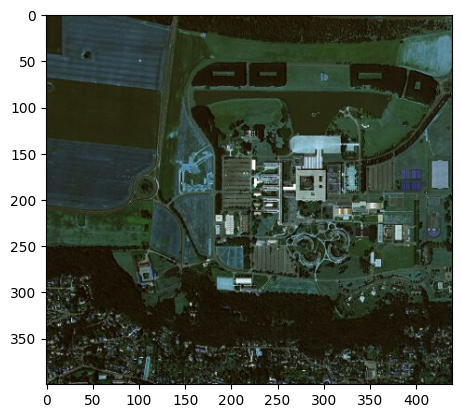

In [6]:
imageBGR = cv.cvtColor(imageRGB, cv.COLOR_RGB2BGR)

imshow(imageBGR)

As the image was alright after imread, it is now displayed with inverted chanels. Let's put it back in order

Reimplement the RGB to BGR conversion without using opencv, manipulating numpy arrays directly.

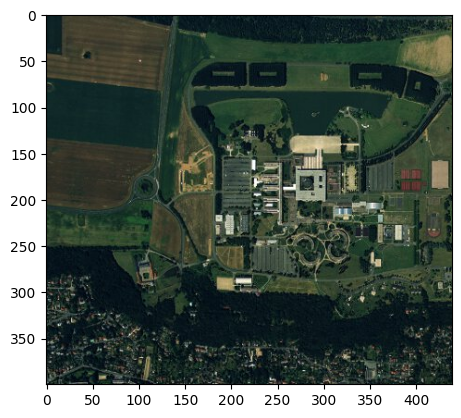

In [7]:
def rgb2bgr(image):
    _imageR = image[:, :, 0]
    _imageG = image[:, :, 1]
    _imageB = image[:, :, 2]

    return np.dstack((_imageB, _imageG, _imageR))


imageBGR = cv.cvtColor(rgb2bgr(imageRGB), cv.COLOR_BGR2RGB)
imshow(imageBGR)

We indeed get our image back by converting it first to BGR then back to RGB. It is proof the function works.

Likewise, you can manipulate the image spatially.
Show a flipped image along the X axis.

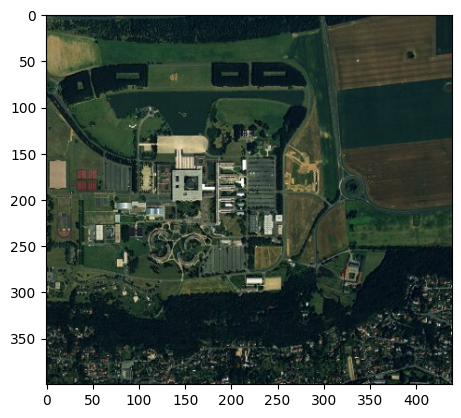

In [8]:
def flipX(image):
    return np.fliplr(image)


imshow(flipX(imageBGR))

And along the Y axis.

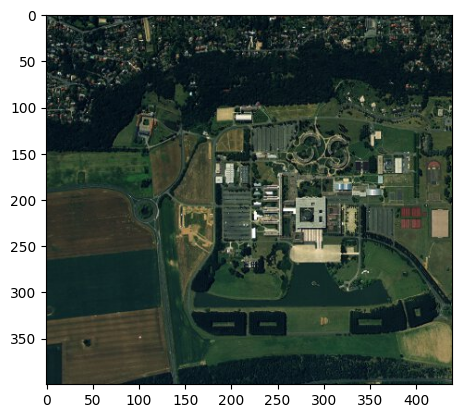

In [9]:
def flipY(image):
    return np.flipud(image)


imshow(flipY(imageBGR))

# BGR to gray

Use OpenCV to convert the image to gray

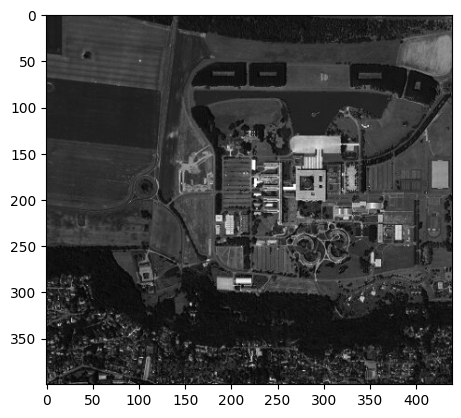

In [10]:
imageGray = cv.cvtColor(imageBGR, cv.COLOR_RGB2GRAY)
imshow(imageGray, cmap='gray')

Let us reimplement this conversion ourselves.

How would you compute a gray level image from a color image ?

The simplest approach is to just average the red, green and blue pixel values.

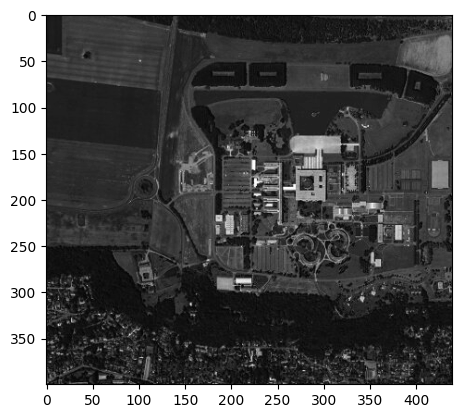

In [11]:
imageGrayMean = np.mean(imageBGR, axis=2)

imshow(imageGrayMean, cmap='gray')

A better approach is based on the human visual system, which is more sensitive to the green channel than the other channels. The standard linear weights are 57.8% green, 29.9% red and 11.4% blue.

hint : use `array.dot`

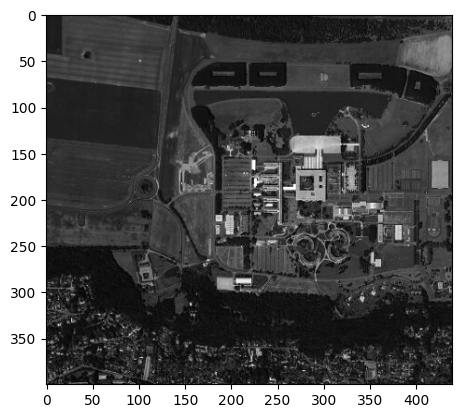

In [12]:
imageGrayLinear = imageBGR.dot([0.299, 0.587, 0.114])

imshow(imageGrayLinear, cmap='gray')

# Image gradients

Opencv offers many image processing functions such as the computation of image gradients (cv.Sobel, cf next lecture). 

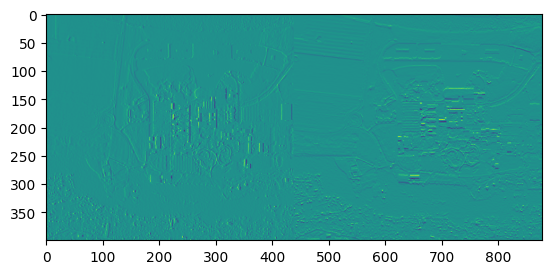

In [13]:
sobelx = cv.Sobel(imageGray, cv.CV_64F, 1, 0, ksize=1)
sobely = cv.Sobel(imageGray, cv.CV_64F, 0, 1, ksize=1)

imshow(cv.hconcat((sobelx, sobely)))

Implement simple gradients using a finite difference scheme.

Return the absolute value of the gradients (using np.fabs) to ensure positive values, as imshow and your screen do not handle negative values !

Image type is cast in float (img.astype(float)) as its current type is uint8, which is an unsigned type and will thus yield unexpected results such as 0-1=255 !

/tmp/ipykernel_11079/1382439690.py:6: RuntimeWarning: overflow encountered in scalar subtract
  imgf[i, j] = np.fabs(img[i-1, j] - img[i+1, j])


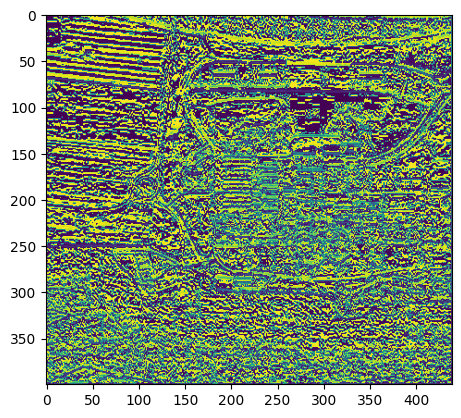

/tmp/ipykernel_11079/1382439690.py:16: RuntimeWarning: overflow encountered in scalar subtract
  imgf[i, j] = np.fabs(img[i, j-1] - img[i, j+1])


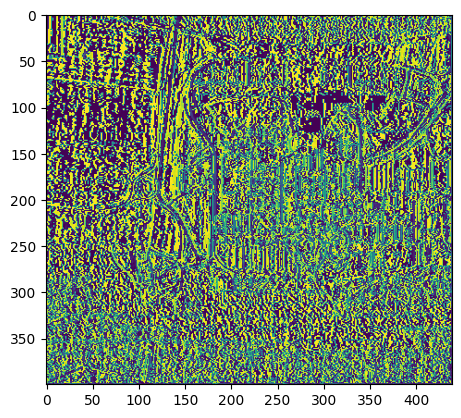

In [14]:
def abs_gradient_x(img):
    imgf = img.astype(float)

    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            imgf[i, j] = np.fabs(img[i-1, j] - img[i+1, j])

    return imgf


def abs_gradient_y(img):
    imgf = img.astype(float)

    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            imgf[i, j] = np.fabs(img[i, j-1] - img[i, j+1])

    return imgf


imshow(abs_gradient_x(imageGray))
imshow(abs_gradient_y(imageGray))

# BGR to HSV Conversion

Red Green and Blue values are just one way of defining color coordinates. Many other color spaces exist which are more suitable for image processing, color manipulation, or for defining distances that are closer to the perceptual distances of the Human Visual System.

HSV stands for [Hue, Saturation, and Value ](https://en.wikipedia.org/wiki/HSL_and_HSV).
- Hue is the "color" of the pixel (color wheel red -> magenta -> blue -> cyan -> green -> yellow -> red -> ...), encoded as an angle in degrees
- Saturation measures if the color is vivid (s=1) or grey (s=0)
- Value encodes the perception of brightness of a pixel compared to black



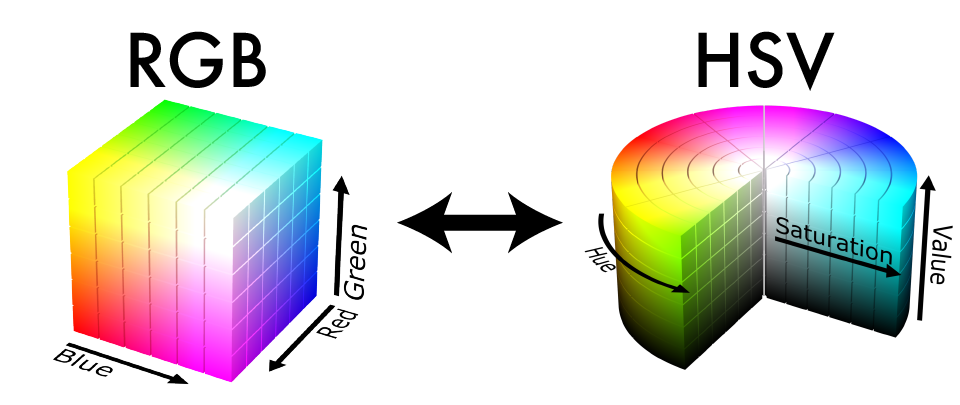

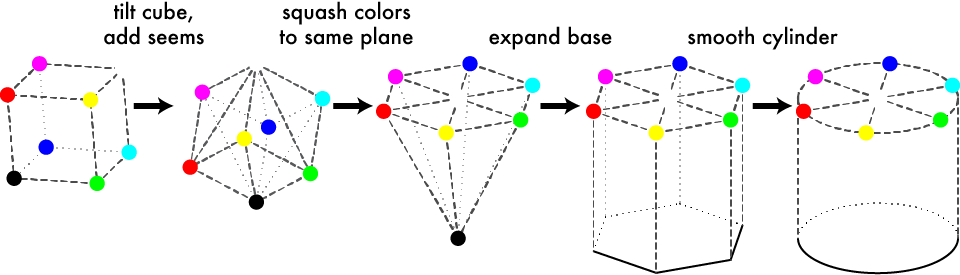

(figure credits : https://github.com/holynski/cse576_sp20_hw1) 

OpenCV provides a color conversion from RGB to HSV and details the computation of the H, S, V values in its [documentation](https://docs.opencv.org/4.5.3/de/d25/imgproc_color_conversions.html). 

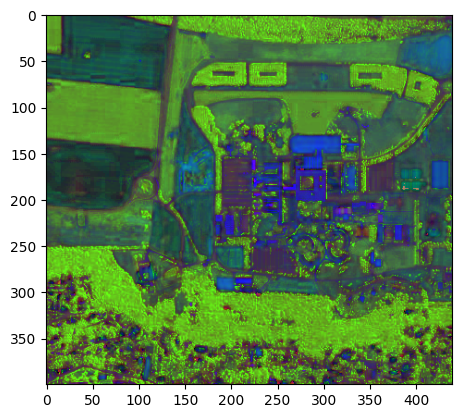

In [15]:
imageHSV = cv.cvtColor(imageRGB, cv.COLOR_RGB2HSV)

imshow(imageHSV)

Reimplement the bgr2hsv conversion function.
- Value is simply the maximum of RGB values : `V = max(R,G,B)`
- Saturation is `S = C / V`, where `C = V - m` and `m = min(R,G,B)`. `S` defaults to `0` when `V=0` to prevent a division by 0.
- Hue depends on which channel as the maximal value as documented in the [opencv documentation](https://docs.opencv.org/4.5.3/de/d25/imgproc_color_conversions.html). 

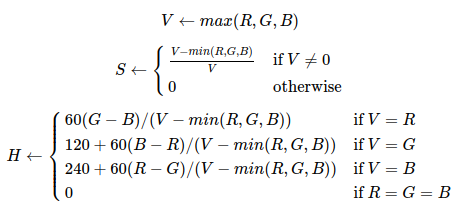

Hints:
- use `np.float32` to work with floating point numbers and export the result using `np.uint8`
- `np.select, np.zeros_like, transpose` may be usefull
- `a[a<0] += 1 ` adds one to all negative entries of a (usefull to ensure H is positive by adding 360 if necessary)
- When computed from uint8 RGB values, HSV value floating point ranges are [0,359]x[0,1]x[0,255]. Please follow opencv convention by casting as uint8 [H/2, 255.S, V], so that it fits in three unsigned bytes ([0,179]x[0,255]x[0,255])

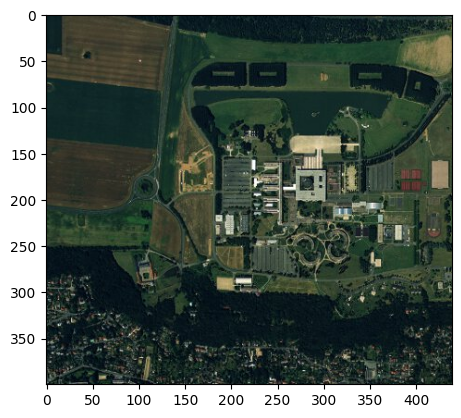

/tmp/ipykernel_11079/1069140643.py:18: RuntimeWarning: invalid value encountered in divide
  h[v == r] = 60 * (g[v == r] - b[v == r]) / c[v == r]
/tmp/ipykernel_11079/1069140643.py:19: RuntimeWarning: invalid value encountered in divide
  h[v == g] = 60 * (2 + (b[v == g] - r[v == g]) / c[v == g])
/tmp/ipykernel_11079/1069140643.py:20: RuntimeWarning: invalid value encountered in divide
  h[v == b] = 60 * (4 + (r[v == b] - g[v == b]) / c[v == b])
/tmp/ipykernel_11079/1069140643.py:23: RuntimeWarning: invalid value encountered in cast
  return np.uint8(np.array([h/2, s*255, v])).transpose(1, 2, 0)


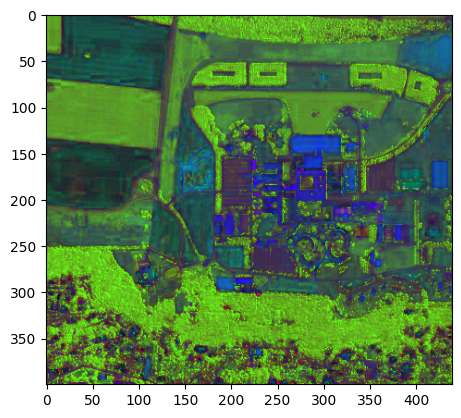

In [16]:
imshow(imageRGB)

def rgb2hsv(rgb):
    rgb = np.float32(rgb)
    
    r = rgb[:, :, 0]
    g = rgb[:, :, 1]
    b = rgb[:, :, 2]
    v = np.max(rgb, axis=2)
    m = np.min(rgb, axis=2)
    c = v - m

    # s = c / v except when v = 0, then s = 0
    s = np.zeros_like(v)
    s[v != 0] = c[v != 0] / v[v != 0]

    h = np.zeros_like(s)
    h[v == r] = 60 * (g[v == r] - b[v == r]) / c[v == r]
    h[v == g] = 60 * (2 + (b[v == g] - r[v == g]) / c[v == g])
    h[v == b] = 60 * (4 + (r[v == b] - g[v == b]) / c[v == b])
    h[h < 0] += 360

    return np.uint8(np.array([h/2, s*255, v])).transpose(1, 2, 0)


imageHSV = rgb2hsv(imageRGB)
imshow(imageHSV)

# HSV to RGB Conversion

you can check your bgr2hsv implementation by using opencv to convert back `imageHSV` to bgr

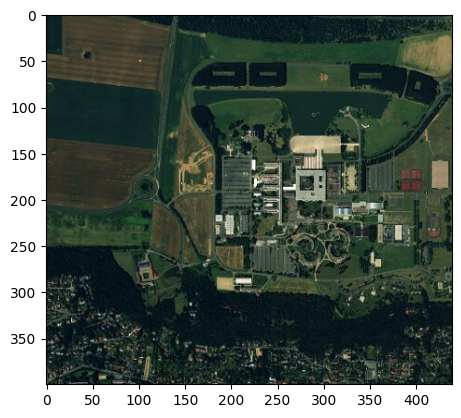

In [17]:
imageRGB = cv.cvtColor(imageHSV, cv.COLOR_HSV2RGB)

imshow(imageRGB)

Here are the formulas for the reverse transform :
- C = V * S
- X = C * (1 - abs(((H / 60) mod 2) - 1))  // use np.fabs and np.fmod which performs a floating point modulo.
- m = V - C
- R = m + R'
- G = m + G'
- B = m + B'    where (R',G',B') is:
 - (C, X, 0) if 0<=H<=60
 - (X, C, 0) if 60<=H<=120
 - (0, C, X) if 120<=H<=180
 - (0, X, C) if 180<=H<=240
 - (X, 0, C) if 240<=H<=300
 - (C, 0, X) if 300<=H<=360

Hint:
- as before, work with floats and export an array of uint8
- `np.floor(h/60)` may help
- convert back H and S to [0,360] and [0,1]

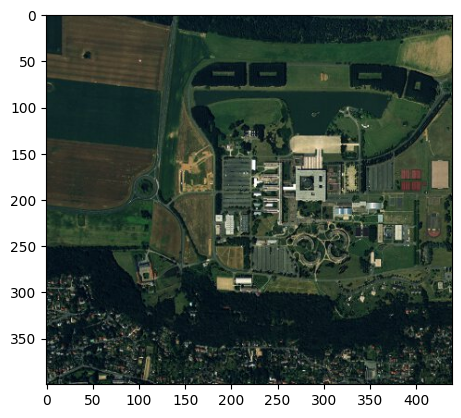

In [18]:
def hsv2rgb(hsv):
    hsv = np.float32(hsv)
    h = hsv[:, :, 0] * 2
    s = hsv[:, :, 1] / 255
    v = hsv[:, :, 2]
    c = v * s
    m = v - c
    x = c * (1 - np.fabs(np.fmod((h / 60), 2) - 1))
    rgb = np.zeros_like(hsv)
    
    # compute the rgb matrix
    rgb[h < 60] = np.stack((c, x, np.zeros_like(h)), axis=2)[h < 60]
    rgb[(h >= 60) & (h < 120)] = np.stack((x, c, np.zeros_like(h)), axis=2)[(h >= 60) & (h < 120)]
    rgb[(h >= 120) & (h < 180)] = np.stack((np.zeros_like(h), c, x), axis=2)[(h >= 120) & (h < 180)]
    rgb[(h >= 180) & (h < 240)] = np.stack((np.zeros_like(h), x, c), axis=2)[(h >= 180) & (h < 240)]
    rgb[(h >= 240) & (h < 300)] = np.stack((x, np.zeros_like(h), c), axis=2)[(h >= 240) & (h < 300)]
    rgb[(h >= 300) & (h < 360)] = np.stack((c, np.zeros_like(h), x), axis=2)[(h >= 300) & (h < 360)]

    rgb += m[:, :, np.newaxis]

    return np.uint8(rgb)


imageRGB = hsv2rgb(imageHSV)
imshow(imageRGB)

# HSV manipulation

Play around with the next 3 functions, that respectively overwrite the hue, saturation and value channels of imageHSV with a constant value given by an interactive slider.

In [19]:
@interact(h=(0, 180, 1))
def imshow_with_hue(h):
    res = np.copy(imageHSV)
    res[:, :, 0] = h
    imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=90, description='h', max=180), Output()), _dom_classes=('widget-interact…

In [20]:
@interact(s=(0, 255, 1))
def imshow_with_saturation(s):
    res = np.copy(imageHSV)
    res[:, :, 1] = s
    imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=127, description='s', max=255), Output()), _dom_classes=('widget-interac…

In [21]:
@interact(v=(0, 255, 1))
def imshow_with_value(v):
    res = np.copy(imageHSV)
    res[:, :, 2] = v
    imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=127, description='v', max=255), Output()), _dom_classes=('widget-interac…

Implement a color shift by rotating the hue by a given amount
hint:
- cast the hue with np.float32, otherwise it is likely to overflow (uint8 may not represent values larger than 255)
- use np.fmod(newhue, 180) to get a value between 0 and 179

In [22]:
@interact(amount=(0, 360, 1))
def rotate_hue(amount):
    res = np.copy(imageHSV)
    res = np.float32(res)
    new_h = res[:, :, 0] + amount
    res[:, :, 0] = np.fmod(new_h, 180)
    imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=180, description='amount', max=360), Output()), _dom_classes=('widget-in…